In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
ride = pd.read_csv("rideshare_kaggle.csv")
# ride = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rideshare_kaggle.csv")

## Modeling - Fare Price Prediction

In [4]:
#dropping rows with missing values
ride.dropna(axis=0,inplace=True)

In [5]:
import datetime
 
# Calling the fromtimestamp() function to
# extract datetime from the given timestamp
ride['timestamp']=pd.to_datetime(ride['timestamp'], unit='s')
timestamp = ride['timestamp']
timestamp

0        2018-12-16 09:30:07.890000128
1        2018-11-27 02:00:23.676999936
2        2018-11-28 01:00:22.197999872
3        2018-11-30 04:53:02.749000192
4        2018-11-29 03:49:20.223000064
                      ...             
693065   2018-12-01 23:53:06.000000000
693066   2018-12-01 23:53:06.000000000
693067   2018-12-01 23:53:06.000000000
693069   2018-12-01 23:53:06.000000000
693070   2018-12-01 23:53:06.000000000
Name: timestamp, Length: 637976, dtype: datetime64[ns]

In [6]:
ride.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000128,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.676999936,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999872,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [7]:
# drop unnecessary column
ride = ride.drop(columns = ['id','timezone','timestamp', 'datetime', 'hour','month', 'day','product_id','latitude','longitude','short_summary','long_summary', 'windGustTime','temperatureHighTime','temperatureLowTime','apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'temperatureMinTime','temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis = 1)

## Observe the correlation among all numerical variables

In [8]:
numeric = ride._get_numeric_data()
numeric

,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,...,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,0.44,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,...,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,43.68,33.73,38.07
1,11.0,0.44,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,...,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,47.30,36.20,43.92
2,7.0,0.44,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,...,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,47.55,31.04,44.12
3,26.0,0.44,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,...,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,45.03,30.30,38.53
4,9.0,0.44,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,...,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,42.18,29.11,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,...,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,44.76,27.77,44.09
693066,13.0,1.00,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,...,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,44.76,27.77,44.09
693067,9.5,1.00,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,...,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,44.76,27.77,44.09
693069,27.0,1.00,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,...,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,44.76,27.77,44.09


In [9]:
numeric.columns

Index(['price', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

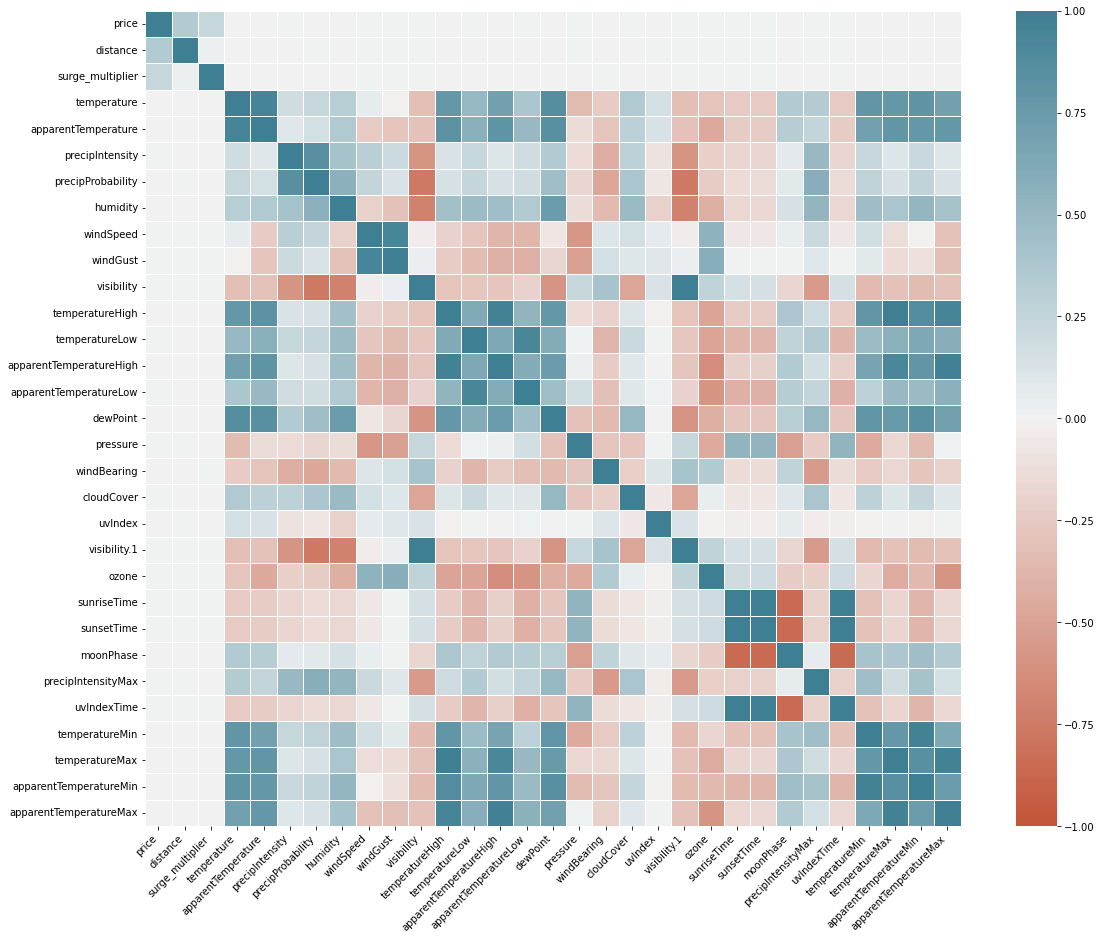

In [10]:
## how to improve the correlation map
data = numeric

corr = data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square = True, 
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

### Encoding Categorical Variables

In [11]:
# get all categorical variables
obj = ride.dtypes == object
categorical_cols = ride.columns[obj]
print(categorical_cols)

Index(['source', 'destination', 'cab_type', 'name', 'icon'], dtype='object')


In [12]:
# Determine how many extra columns would be created
num_ohc_cols = (ride[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

40

In [13]:
%%time

# encode categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(ride[col]).astype(int)
    
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index = ride.index, 
                          columns = col_names)
    value_colname_mapping = sorted(list(zip(ride[col].unique(), col_names)), key=lambda x: x[0])

    # Print original values and their one-hot encoded versions in the same order
    print(f"Original values and their one-hot encoded versions for {col}:")
    for original_value, one_hot_colname in value_colname_mapping:
        one_hot_value = np.zeros(n_cols)
        one_hot_value[col_names.index(one_hot_colname)] = 1
        print(f"{original_value}: {one_hot_value}")
    print("\n")
    
    # Append the new data to the dataframe
    ride = pd.concat([ride, new_df], axis=1)
    
    # Remove the original column from the dataframe
    ride = ride.drop(col, axis=1)


Original values and their one-hot encoded versions for source:
Back Bay: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Beacon Hill: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Boston University: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Fenway: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Financial District: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Haymarket Square: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
North End: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
North Station: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Northeastern University: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
South Station: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Theatre District: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
West End: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Original values and their one-hot encoded versions for destination:
Back Bay: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Beacon Hill: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Boston University: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Fenway: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Financial District: [0. 0. 

In [14]:
ride['timestamp'] = timestamp

In [15]:
# Get the date of every ride
ride["Date"] = ride["timestamp"].dt.date
del ride['timestamp']

## Baseline Model - Take the price of a moving average of 1 day as baseline

In [16]:
# split the data
import statsmodels.api as sm

ride_train = ride.sample(frac=0.8, random_state=1)
ride_test = ride.drop(ride_train.index)

In [17]:
# calculate the average price of the day for training set
in_range_df = pd.pivot_table(ride_train, values=['price'],
                 index=['Date'],
                  aggfunc={'price':np.mean})
in_range_df['Date'] = in_range_df.index
in_range_df['Base_Price'] = in_range_df['price']
del in_range_df['price']
in_range_df

,Date,Base_Price
Date,,
2018-11-26,2018-11-26,16.617711
2018-11-27,2018-11-27,16.586300
2018-11-28,2018-11-28,16.522044
2018-11-29,2018-11-29,16.556943
2018-11-30,2018-11-30,16.437518
2018-12-01,2018-12-01,16.571723
2018-12-02,2018-12-02,16.525679
2018-12-03,2018-12-03,16.452130
2018-12-04,2018-12-04,16.700108


In [18]:
base_train = ride_train.set_index('Date').join(in_range_df.set_index('Date'), how='inner')
base_train['Date'] = base_train.index
del base_train['Date']
# del base_train['timestamp']
# base_train.head(3)

In [19]:
# calculate the average price of the day for testing set
in_range_df_1 = pd.pivot_table(ride_test, values=['price'],
                 index=['Date'],
                  aggfunc={'price':np.mean})
in_range_df_1['Date'] = in_range_df_1.index
in_range_df_1['Base_Price'] = in_range_df_1['price']
del in_range_df_1['price']
in_range_df_1

,Date,Base_Price
Date,,
2018-11-26,2018-11-26,16.179391
2018-11-27,2018-11-27,16.605152
2018-11-28,2018-11-28,16.542629
2018-11-29,2018-11-29,16.595253
2018-11-30,2018-11-30,16.342112
2018-12-01,2018-12-01,16.575284
2018-12-02,2018-12-02,16.642462
2018-12-03,2018-12-03,16.514854
2018-12-04,2018-12-04,16.470301


In [20]:
base_test = ride_test.set_index('Date').join(in_range_df_1.set_index('Date'), how='inner')
base_test['Date'] = base_test.index
del base_test['Date']
base_test.head(3)

,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,...,icon_0,icon_1,icon_2,icon_3,icon_4,icon_5,icon_6,cab_type_0,cab_type_1,Base_Price
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-26,13.5,2.36,1.0,41.30,41.30,0.0000,0.00,0.93,2.55,2.60,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16.179391
2018-11-26,12.5,4.43,1.0,41.99,41.99,0.0000,0.00,0.91,0.53,0.88,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.179391
2018-11-26,32.5,3.18,1.0,45.80,43.94,0.0024,0.29,0.89,4.10,4.30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16.179391


In [21]:
X_base_train = base_train.drop(['Base_Price'], axis=1) # was ride_train[features]
y_base_train = base_train['Base_Price']

X_base_test = base_test.drop(['Base_Price'], axis=1) #col was ride_test[features]
y_base_test = base_test['Base_Price']

# We must add an intercept as the standard model doesn't automatically fit one
X_base_train = sm.add_constant(X_base_train)
X_base_test = sm.add_constant(X_base_test) #added this line
# fit the data to the model
model = sm.OLS(y_base_train, X_base_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Base_Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:33:45   Log-Likelihood:             1.0625e+06
No. Observations:              510381   AIC:                        -2.125e+06
Df Residuals:                  510313   BIC:                        -2.124e+06
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR = LR.fit(X_base_train, y_base_train)
y_train_pred = LR.predict(X_base_train)
y_test_pred = LR.predict(X_base_test)

# MSE
print('train mse: ', np.sqrt(mean_squared_error(y_base_train, y_train_pred)))
print('test mse: ',  np.sqrt(mean_squared_error(y_base_test, y_test_pred)))

# R2 score
model1 = LinearRegression().fit(X_base_train, y_base_train)
R_squared = model1.score(X_base_train, y_base_train)
print('R_squared:', R_squared)


train mse:  0.030175315381933382
test mse:  0.12149411147468951
R_squared: 0.6568656755045368


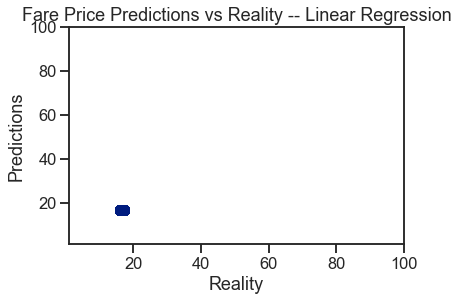

In [23]:
# Plot test dataset Prediction
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# use y_test, y_test_pred
ax.scatter(y_base_test, y_test_pred, alpha=.5)
ax.set_xlim(1, 100)
ax.set_ylim(1, 100)
ax.set(xlabel='Reality', 
       ylabel='Predictions',
       title='Fare Price Predictions vs Reality -- Linear Regression');

## Linear Regression Model

In [24]:
# Choose the features to be used

del ride_train['Date']
del ride_test['Date']

X_train = ride_train.drop(['price'], axis=1) # was ride_train[features]
y_train = ride_train['price']

X_test = ride_test.drop(['price'], axis=1) #col was ride_test[features]
y_test = ride_test['price']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test) #added this line
# fit the data to the model
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.005e+05
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:33:54   Log-Likelihood:            -1.1905e+06
No. Observations:              510381   AIC:                         2.381e+06
Df Residuals:                  510314   BIC:                         2.382e+06
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [25]:
X_train

,const,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,...,name_11,icon_0,icon_1,icon_2,icon_3,icon_4,icon_5,icon_6,cab_type_0,cab_type_1
658311,1.0,2.16,1.0,41.34,34.55,0.0000,0.00,0.78,11.92,15.18,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
547209,1.0,2.25,1.0,51.84,51.84,0.0000,0.00,0.80,3.58,5.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
225076,1.0,1.56,1.0,36.95,36.95,0.0000,0.00,0.86,1.63,2.32,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
360104,1.0,0.74,1.0,41.35,35.62,0.0000,0.00,0.60,9.29,11.60,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635115,1.0,3.14,1.0,37.71,31.92,0.0000,0.00,0.90,7.78,7.78,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450255,1.0,3.58,1.0,40.77,35.14,0.0000,0.00,0.63,8.76,14.90,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
299568,1.0,3.39,1.0,47.87,47.87,0.0000,0.00,0.93,2.77,4.54,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
642890,1.0,3.14,1.0,40.38,35.18,0.0000,0.00,0.71,7.73,11.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
608760,1.0,2.87,1.0,31.71,22.64,0.0025,0.17,0.61,11.52,20.61,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# MSE
print('train mse: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test mse: ',  np.sqrt(mean_squared_error(y_test, y_test_pred)))

# R2 score
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_test, y_test_pred))


train mse:  2.493138522118031
test mse:  2.484092998159326
r2 score:  0.9286870041997767


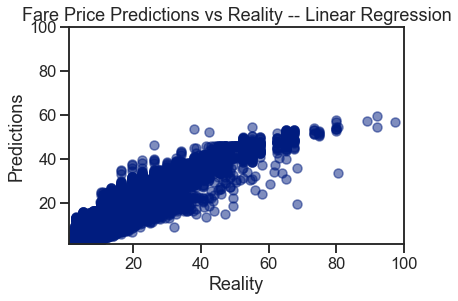

In [27]:
# Plot test dataset Prediction
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)
ax.set_xlim(1, 100)
ax.set_ylim(1, 100)
ax.set(xlabel='Reality', 
       ylabel='Predictions',
       title='Fare Price Predictions vs Reality -- Linear Regression');

In [28]:
# Cross Validation
from sklearn.model_selection  import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)

print("%0.2f accuracy" % (scores.mean()))

0.93 accuracy


In [30]:
X_train

,const,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,...,name_11,icon_0,icon_1,icon_2,icon_3,icon_4,icon_5,icon_6,cab_type_0,cab_type_1
658311,1.0,2.16,1.0,41.34,34.55,0.0000,0.00,0.78,11.92,15.18,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
547209,1.0,2.25,1.0,51.84,51.84,0.0000,0.00,0.80,3.58,5.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
225076,1.0,1.56,1.0,36.95,36.95,0.0000,0.00,0.86,1.63,2.32,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
360104,1.0,0.74,1.0,41.35,35.62,0.0000,0.00,0.60,9.29,11.60,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635115,1.0,3.14,1.0,37.71,31.92,0.0000,0.00,0.90,7.78,7.78,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450255,1.0,3.58,1.0,40.77,35.14,0.0000,0.00,0.63,8.76,14.90,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
299568,1.0,3.39,1.0,47.87,47.87,0.0000,0.00,0.93,2.77,4.54,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
642890,1.0,3.14,1.0,40.38,35.18,0.0000,0.00,0.71,7.73,11.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
608760,1.0,2.87,1.0,31.71,22.64,0.0025,0.17,0.61,11.52,20.61,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_train.columns

Index(['const', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'source_0',
       'source_1', 'source_2', 'source_3', 'source_4', 'source_5', 'source_6',
       'source_7', 'source_8', 'source_9', 'source_10', 'source_11',
       'destination_0', 'destination_1', 'destination_2', 'destination_3',
       'destination_4', 'destination_5', 'destination_6', 'destination_7',
       'destination_8', 'destination_9', 'destination_10', 'destination_11',
       'name_0', 'name_1', 'name_2', 'nam

In [32]:
X_train = X_train.drop(columns = ['const','temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax','source_0',
       'source_1', 'source_2', 'source_3', 'source_4', 'source_5', 'source_6',
       'source_7', 'source_8', 'source_9', 'source_10', 'source_11',
       'destination_0', 'destination_1', 'destination_2', 'destination_3',
       'destination_4', 'destination_5', 'destination_6', 'destination_7',
       'destination_8', 'destination_9', 'destination_10', 'destination_11', 'icon_0', 'icon_1',
       'icon_2', 'icon_3', 'icon_4', 'icon_5', 'icon_6', 'cab_type_0',
       'cab_type_1'])
X_test = X_test.drop(columns =['const','temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax','source_0',
       'source_1', 'source_2', 'source_3', 'source_4', 'source_5', 'source_6',
       'source_7', 'source_8', 'source_9', 'source_10', 'source_11',
       'destination_0', 'destination_1', 'destination_2', 'destination_3',
       'destination_4', 'destination_5', 'destination_6', 'destination_7',
       'destination_8', 'destination_9', 'destination_10', 'destination_11', 'icon_0', 'icon_1',
       'icon_2', 'icon_3', 'icon_4', 'icon_5', 'icon_6', 'cab_type_0',
       'cab_type_1'] )

In [33]:
X_train

,distance,surge_multiplier,name_0,name_1,name_2,name_3,name_4,name_5,name_6,name_7,name_8,name_9,name_10,name_11
658311,2.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
547209,2.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
225076,1.56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
360104,0.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
635115,3.14,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450255,3.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
299568,3.39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
642890,3.14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
608760,2.87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Decision tree regressor 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.arange(0, 0.01, 0.001).tolist(),
              'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

dtc = DecisionTreeRegressor(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=2).fit(X_train, y_train)

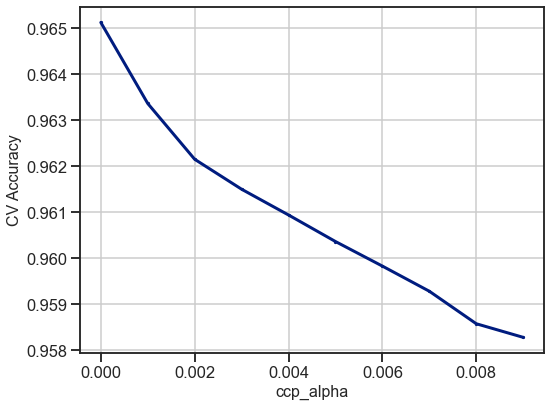

Best ccp_alpha {'ccp_alpha': 0.0, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


In [35]:
import matplotlib.pyplot as plt

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

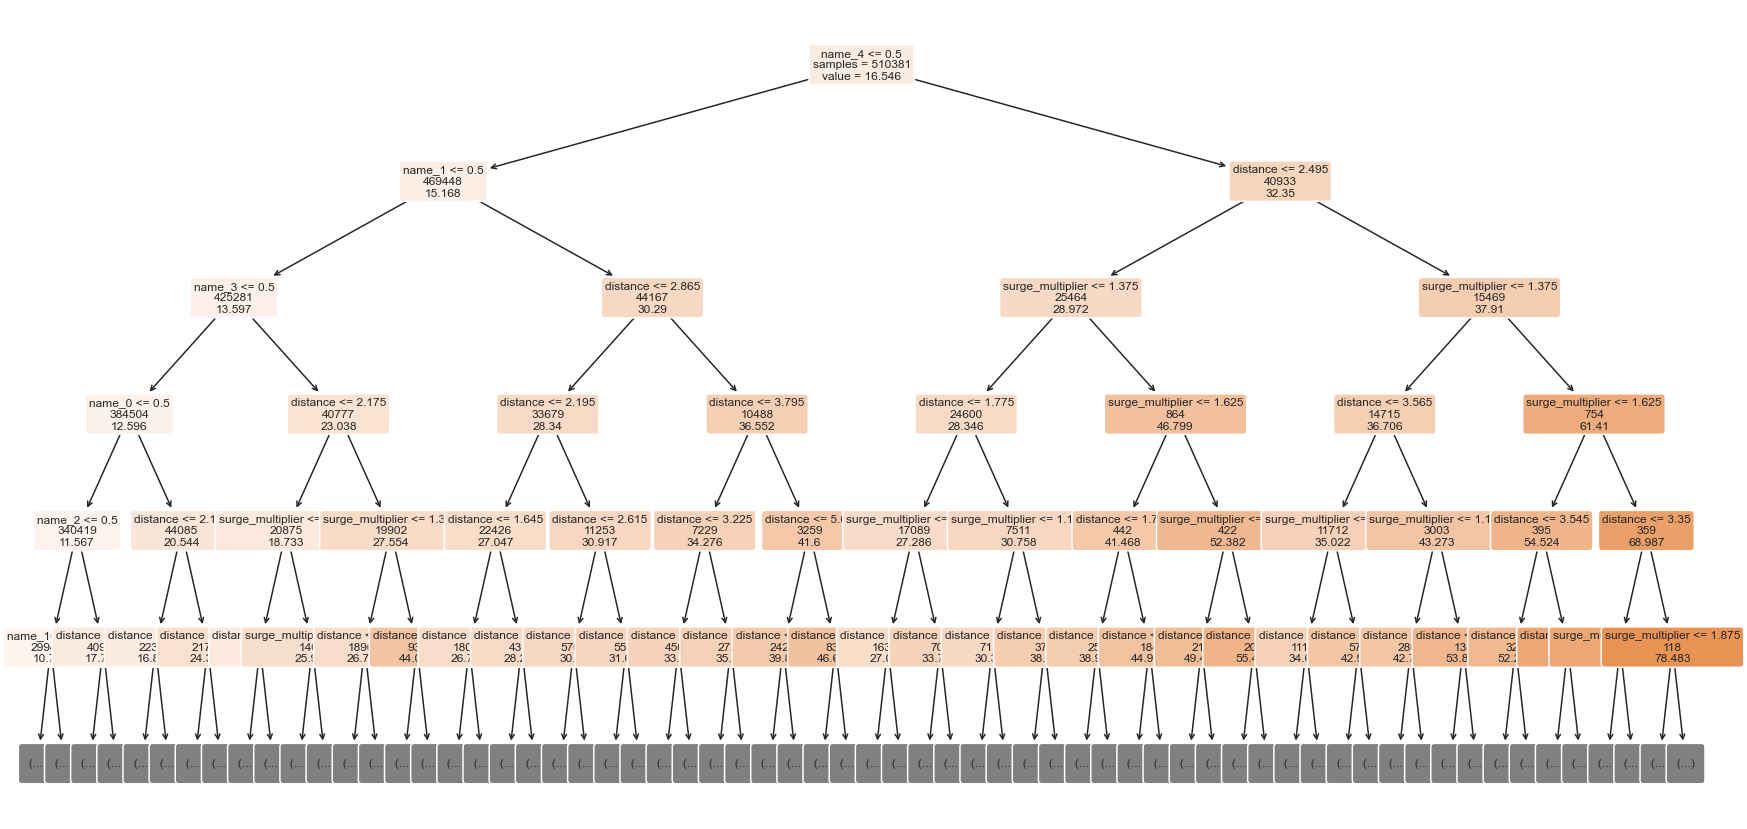

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(dtc_cv.best_estimator_, 
          feature_names= X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth = 5,
          label='root')
plt.show()

In [37]:
from sklearn.metrics import r2_score

print('CV R2:', round(dtc_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, dtc_cv.predict(X_test)), 5))

CV R2: 0.96513
OSR2: 0.96485


# XG BOOST 

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [43]:
#This is to deal with the error assocoated with uniquness of our features(duplicate columns)
X_train = X_train.loc[:,~X_train.columns.duplicated()].copy()
X_test = X_test.loc[:,~X_test.columns.duplicated()].copy()

In [44]:
X_train

,distance,surge_multiplier,name_0,name_1,name_2,name_3,name_4,name_5,name_6,name_7,name_8,name_9,name_10,name_11
658311,2.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
547209,2.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
225076,1.56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
360104,0.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
635115,3.14,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450255,3.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
299568,3.39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
642890,3.14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
608760,2.87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
# Various hyper-parameters to tune
xgb1 = xg.XGBRegressor()
parameters = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=False)

xgb_grid.fit(X_train,
         y_train)


[09:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_b

In [46]:
print('CV R2:', xgb_grid.best_score_, 5)
XG_OSR2 = r2_score(y_test, xgb_grid.predict(X_test))
print('OSR2:', round(XG_OSR2, 5))
print('Best parameters', xgb_grid.best_params_)

CV R2: 0.9641773889345275 5
OSR2: 0.96344
Best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': -1, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [48]:
xgb1.fit(X_train,
         y_train)

model_file = 'xgb_model.bin'
xgb1.save_model(model_file)

In [49]:
import sys
import xgboost as xgb
import pandas as pd
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout, QFormLayout, QComboBox
from PyQt5.QtGui import QFont, QIcon

# Define the input variables
input_vars = ['Distance', 'Surge', 'Lyft Shared', 'Lyft Lux', 'Lyft', 'Lyft Lux Black XL', 'Lyft XL', 'Lyft Lux Black', 'Uber XL', 'Uber Black', 'Uber X', 'Uber Wheelchair access', 'Uber Black SUV', 'Uber Pool']

# Load the trained XGBoost model
xgb_model = xgb.Booster()
xgb_model.load_model(model_file)

class MainWindow(QWidget):
    def __init__(self):
        super().__init__()

        # Set custom font
        font = QFont("Arial", 16)

        # Create the GUI elements
        self.labels = []
        self.line_edits = []
        self.button = QPushButton('Predict')
        self.result_label = QLabel()
        self.ride_type_combobox = QComboBox()

        # Set the style sheet for the window
        self.setStyleSheet('''
            QWidget {
                background-color: #FFF;
                color: #444;
            }

            QLabel {
                font-size: 16px;
            }

            QLineEdit {
                font-size: 16px;
                padding: 5px;
                border: 2px solid #DDD;
                border-radius: 5px;
            }

            QPushButton {
                font-size: 16px;
                padding: 5px;
                border: none;
                border-radius: 5px;
                background-color: #5FCCF5;
                color: #FFF;
            }

            QPushButton:hover {
                background-color: #3FA6C5;
            }

            QLabel#result_label {
                font-size: 20px;
                color: #444;
                margin-top: 20px;
            }

            QComboBox {
                font-size: 16px;
                padding: 5px;
                border: 2px solid #DDD;
                border-radius: 5px;
            }
        ''')

        # Create the input elements
        for var in input_vars:
            label = QLabel(f'{var}:')
            label.setFont(font)
            self.labels.append(label)

        self.distance_edit = QLineEdit()
        self.distance_edit.setFont(font)
        self.surge_edit = QLineEdit()
        self.surge_edit.setFont(font)
        self.line_edits = [self.distance_edit, self.surge_edit]

        for var in input_vars[2:]:
            self.ride_type_combobox.addItem(var)

        # Create a form layout
        form_layout = QFormLayout()

        # Add the input elements to the layout
        form_layout.addRow(self.labels[0], self.distance_edit)
        form_layout.addRow(self.labels[1], self.surge_edit)
        form_layout.addRow(QLabel('Ride Type:'), self.ride_type_combobox)

        # Create a vertical layout
        layout = QVBoxLayout()

        # Add the form layout and other elements to the layout
        layout.addLayout(form_layout)
        layout.addWidget(self.button)
        layout.addWidget(self.result_label)

        # Set the layout for the window
        self.setLayout(layout)

        # Connect the button to the predict function
        self.button.clicked.connect(self.predict_output)
        
    def predict_output(self):
        # Get user inputs
        input_data = [0] * len(input_vars)
        input_data[0] = float(self.distance_edit.text())
        input_data[1] = float(self.surge_edit.text())

        # Set the selected ride type to 1
        selected_ride_type = self.ride_type_combobox.currentIndex() + 2
        input_data[selected_ride_type] = 1

        # Prepare input data as a DataFrame
        input_df = pd.DataFrame([input_data], columns=input_vars)

         # Make the prediction
        prediction = xgb_model.predict(xgb.DMatrix(input_df))[0]

        # Set the result label text
        self.result_label.setText(f"The predicted output is {prediction:.2f}")

# Create the QApplication and MainWindow
app = QApplication(sys.argv)
app.setStyle('Fusion') # Set the Fusion style for the application
app.setWindowIcon(QIcon("app_icon.png"))  # Set the app icon
window = MainWindow()

# Set the window title and dimensions
window.setWindowTitle('XGBoost Model Predictor')
window.setGeometry(100, 100, 400, 600)

# Show the MainWindow
window.show()

# Run the QApplication event loop
sys.exit(app.exec_())

SystemExit: 0

C:\Users\bhaws\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
